## Steam Games Clustering Analysis
### Author: Linh Nguyen

### Project Overview:
The objective of this project is to perform clustering analysis on a dataset containing information about various Steam games. The goal is to identify patterns and groupings among these games based on different features such as positive and negative ratings, price, and various game-specific attributes. The project involves using the KMeans clustering algorithm to categorize the games into distinct clusters.

### Dataset:
The dataset used in this project is a cleaned Steam game data file (cleaned_steam_game_data.csv). It contains information on a variety of games, including features such as appid, name, release date, developer, publisher, required age, achievements, positive and negative ratings, and more. The dataset encompasses a diverse set of attributes related to each game, allowing for a comprehensive analysis of the gaming landscape on the Steam platform.

### Methodology:
#### Cluster Analysis:

Explore and analyze the characteristics of each cluster.
Generate summary statistics for each cluster, including mean values and counts.
#### Visualization:

Visualize the distribution of games across clusters using bar charts.
Explore specific features of interest for each cluster, such as owners, positive/negative ratings, and price.
### Significance of the Project:
- Market Segmentation: Understanding clusters can help in market segmentation, allowing game developers and publishers to tailor their strategies for different player preferences.

- Game Profiling: Clustering enables the identification of distinct types of games based on user interactions, providing valuable insights for game developers and marketers.

- User Recommendations: Clustering analysis can aid in recommending games to users based on their preferences, potentially improving user experience and engagement on the Steam platform.

- Decision Support: The results of this analysis can inform strategic decisions related to game development, marketing, and sales, providing a data-driven approach to decision-making.

## Dataset Loading

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cleaned_steam_game_data.csv')
data.head()

,appid,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,...,Local Multi-player-C,Single-player-C,MMO-C,Captions available-C,Linux,Windows,Mac,day,month,year
0,10,Counter-Strike,01-11-2000,1,Valve,Valve,0,0,124534,3339,...,0,0,0,0,1,1,1,1,11,2000
1,20,Team Fortress Classic,01-04-1999,1,Valve,Valve,0,0,3318,633,...,0,0,0,0,1,1,1,1,4,1999
2,30,Day of Defeat,01-05-2003,1,Valve,Valve,0,0,3416,398,...,0,0,0,0,1,1,1,1,5,2003
3,40,Deathmatch Classic,01-06-2001,1,Valve,Valve,0,0,1273,267,...,0,0,0,0,1,1,1,1,6,2001
4,50,Half-Life: Opposing Force,01-11-1999,1,Gearbox Software,Valve,0,0,5250,288,...,0,1,0,0,1,1,1,1,11,1999


## Data Preprocessing & Choosing Optimal Number of Clusters

In [3]:
X = data.drop(['name','release_date','developer','publisher','tag1', 'tag2', 'tag3','day'], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

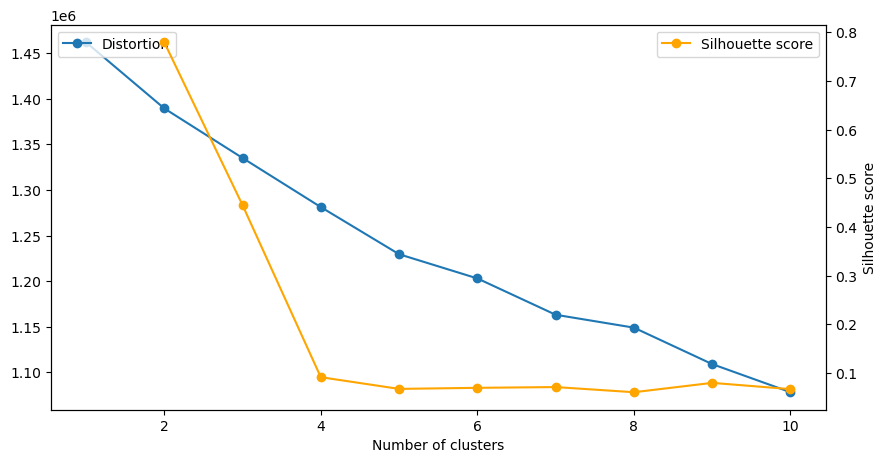

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    distortions.append(kmeans.inertia_)
ax.plot(range(1, 11), distortions, marker='o', label='Distortion')
ax.set_xlabel('Number of clusters')

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_scores.append(score)
ax2 = ax.twinx()
ax2.plot(range(2, 11), silhouette_scores, marker='o', color='orange', label='Silhouette score')
ax2.set_ylabel('Silhouette score')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


## Clustering

/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                 appid   english  required_age  achievements  \
cluster                                                        
0        596405.228086  0.981660      0.350936     45.962367   
1        590534.765730  0.961178      0.542169     26.021419   
2        585748.613861  0.990099      0.000000      2.178218   

         positive_ratings  negative_ratings  average_playtime  \
cluster                                                         
0              714.299996        129.647996        113.886529   
1            11057.717537       3087.775100       1419.453815   
2              951.099010         66.475248         86.485149   

         median_playtime        owners      price  ...  Local Multi-player-C  \
cluster                                            ...                         
0             110.554924  1.041741e+05   6.061492  ...                   0.0   
1            1401.697456  1.184431e+06   4.236118  ...                   0.0   
2              77.970297  1.34207

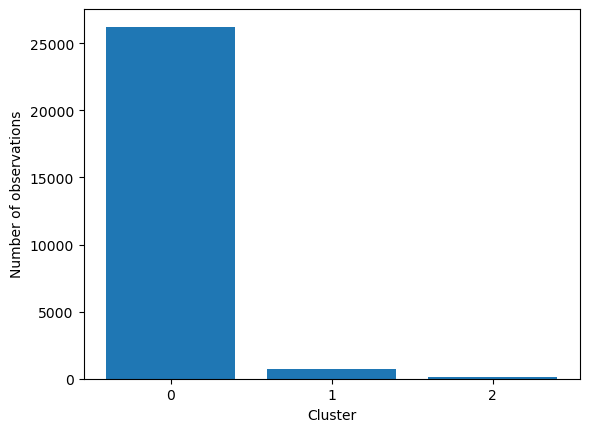

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_std)

cluster_labels = kmeans.labels_

cluster_df = pd.DataFrame(X)
cluster_df['cluster'] = kmeans.labels_
cluster_summary = cluster_df.groupby('cluster').agg('mean')

# Add a column for the number of observations in each cluster
cluster_summary['count'] = cluster_df['cluster'].value_counts()

print(cluster_summary)

cluster_counts = cluster_summary['count']

plt.bar(cluster_counts.index, cluster_counts)

plt.xlabel('Cluster')
plt.ylabel('Number of observations')
plt.xticks(cluster_counts.index)
plt.show()

## Clustering Ananalysis & Visualization

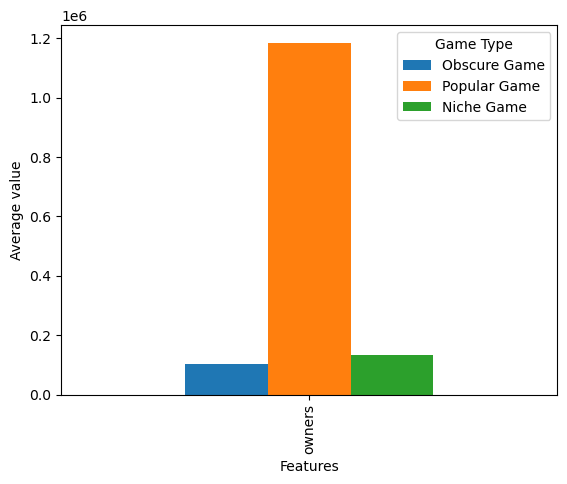

In [6]:
cluster_summary_T = cluster_summary.T

cluster_summary_T = cluster_summary_T.drop('count')

features_of_interest = ['owners']
cluster_summary_filtered = cluster_summary[features_of_interest]

cluster_summary_filtered_T = cluster_summary_filtered.T
cluster_summary_filtered_T = cluster_summary_filtered_T.rename_axis('')


cluster_summary_filtered_T.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()

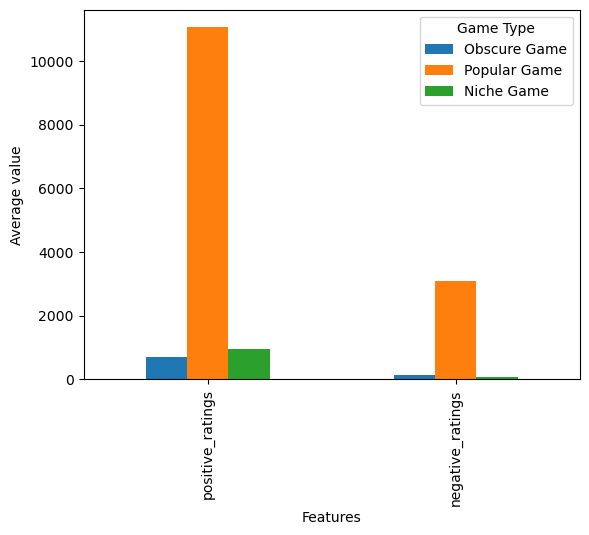

In [7]:
features_of_interest2 = ['positive_ratings','negative_ratings']
cluster_summary_filtered2 = cluster_summary[features_of_interest2]

cluster_summary_filtered_T2 = cluster_summary_filtered2.T

cluster_summary_filtered_T2.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()

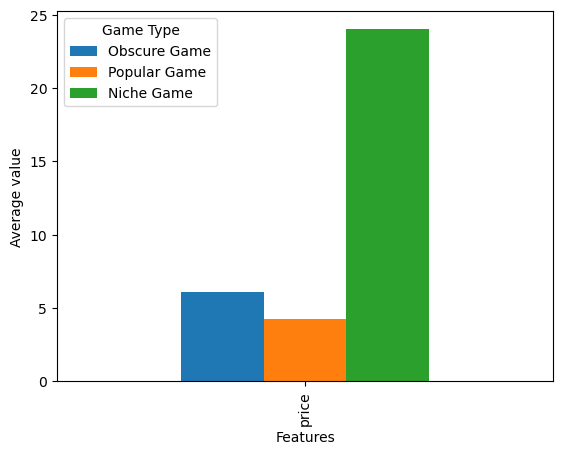

In [8]:
features_of_interest3 = ['price']
cluster_summary_filtered3 = cluster_summary[features_of_interest3]

cluster_summary_filtered_T3 = cluster_summary_filtered3.T

cluster_summary_filtered_T3.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')

legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()

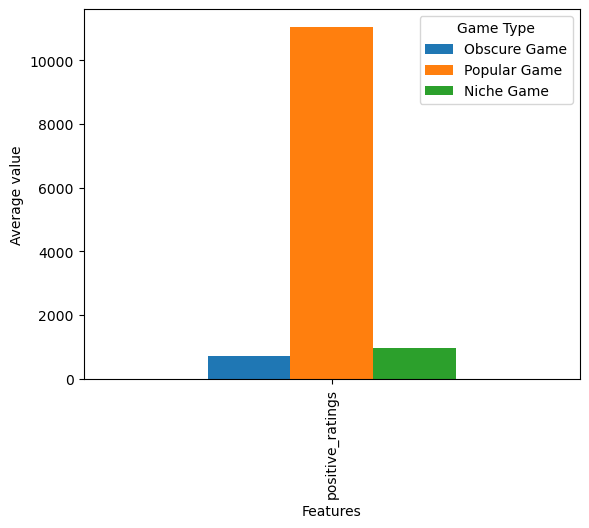

In [9]:
features_of_interest4 = ['positive_ratings']
cluster_summary_filtered4 = cluster_summary[features_of_interest4]

cluster_summary_filtered_T4 = cluster_summary_filtered4.T

cluster_summary_filtered_T4.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")
plt.show()

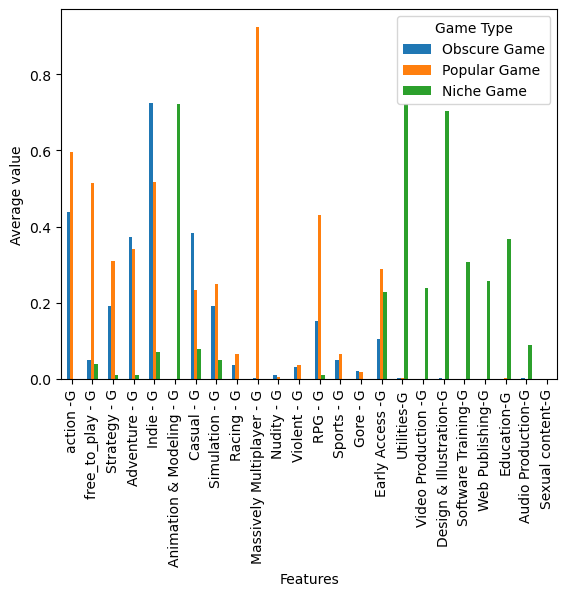

In [10]:
cluster_summary_filtered6 = cluster_summary.iloc[:,10:34]

cluster_summary_filtered_T6 = cluster_summary_filtered6.T

cluster_summary_filtered_T6.plot(kind='bar')

plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

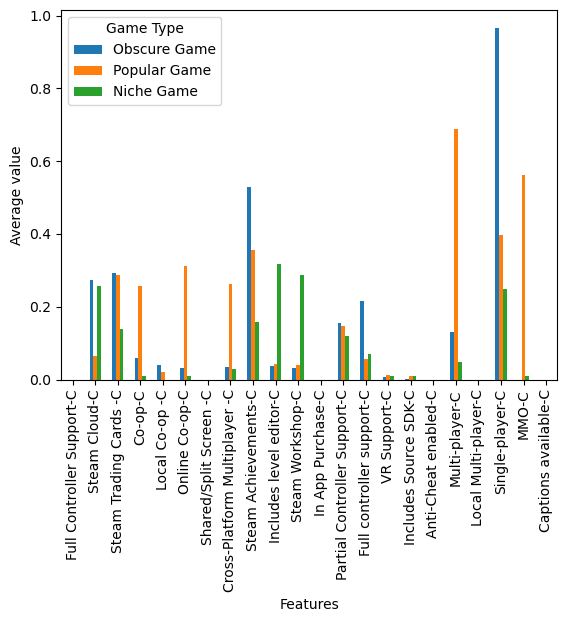

In [11]:
cluster_summary_filtered7 = cluster_summary.iloc[:,35:57]

cluster_summary_filtered_T7 = cluster_summary_filtered7.T

cluster_summary_filtered_T7.plot(kind='bar')

# Add labels for the x and y axes
plt.xlabel('Features')
plt.ylabel('Average value')
legend_labels = ['Obscure Game', 'Popular Game', 'Niche Game']
plt.legend(legend_labels, title="Game Type")

plt.show()